In [4]:
import pandas as pd

data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv',index_col = 0)

In [5]:
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [6]:
data.tail()

,TV,radio,newspaper,sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [7]:
data.shape

(200, 4)

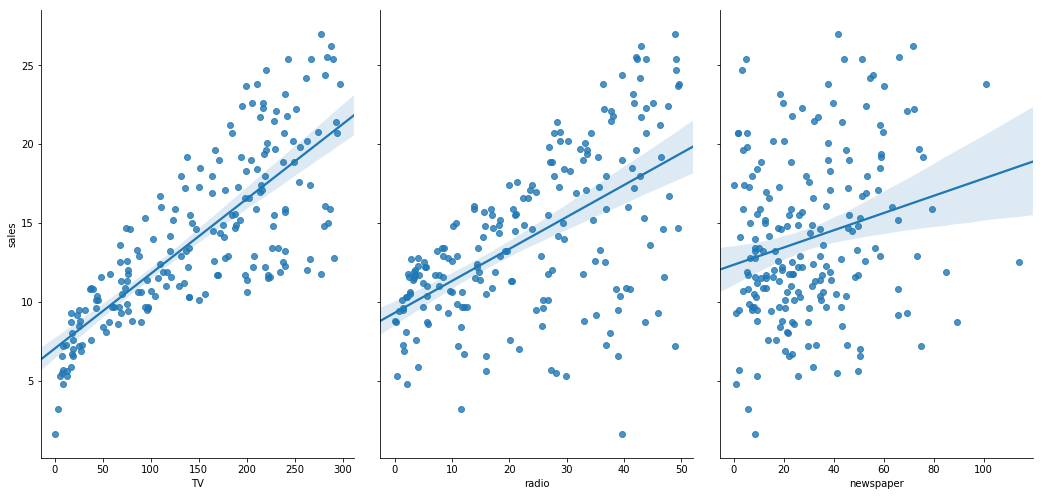

In [14]:
import seaborn as sns
%matplotlib inline

sns.pairplot(data,x_vars = ['TV','radio','newspaper'],y_vars = 'sales',size = 7,aspect = 0.7,kind = 'reg') #after passing kind = 'reg' best possible line for linear regression is plotted

# Preparing X and y

In [20]:
X = data[['TV','radio','newspaper']]

print(X.head())

      TV  radio  newspaper
1  230.1   37.8       69.2
2   44.5   39.3       45.1
3   17.2   45.9       69.3
4  151.5   41.3       58.5
5  180.8   10.8       58.4


In [22]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [23]:
y = data['sales']

In [24]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


## Splitting X and y into training and testing sets

In [31]:
from sklearn.cross_validation import train_test_split

Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,random_state = 1)

In [32]:
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(150, 3)
(50, 3)
(150,)
(50,)


## using Scikit learn for Linear Regression

In [36]:
#Step 1
from sklearn.linear_model import LinearRegression

#Step 2
linreg = LinearRegression()

#Step 3 fitting to the training data 
linreg.fit(Xtrain,ytrain) # model is learning the intercept(theta[0]) and coefficients(theta[1:-1])

#Step 4



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
print(linreg.intercept_)# theta[0]

print(linreg.coef_) #theta[1:-1]

2.8769666223179318
[0.04656457 0.17915812 0.00345046]


## Making Predictions

In [42]:
y_pred = linreg.predict(Xtest)

# Computing the Error

## 1 Mean Absolute Error

In [47]:
from sklearn import metrics

print(metrics.mean_absolute_error(ytest,y_pred))

1.0668917082595213


## 2 Mean Squared Error

In [48]:
print(metrics.mean_squared_error(ytest,y_pred))

1.9730456202283384


## 3 Root Mean Squared Error

In [52]:
import numpy as np
print(np.sqrt(metrics.mean_squared_error(ytest,y_pred)))

1.4046514230328955
